# Import Libraries and Data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./data/AB_NYC_2019.csv')


# Initial Data Exploration

In [55]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Look at the big picture to see if there's anything particularly interesting

<Figure size 2160x2160 with 0 Axes>

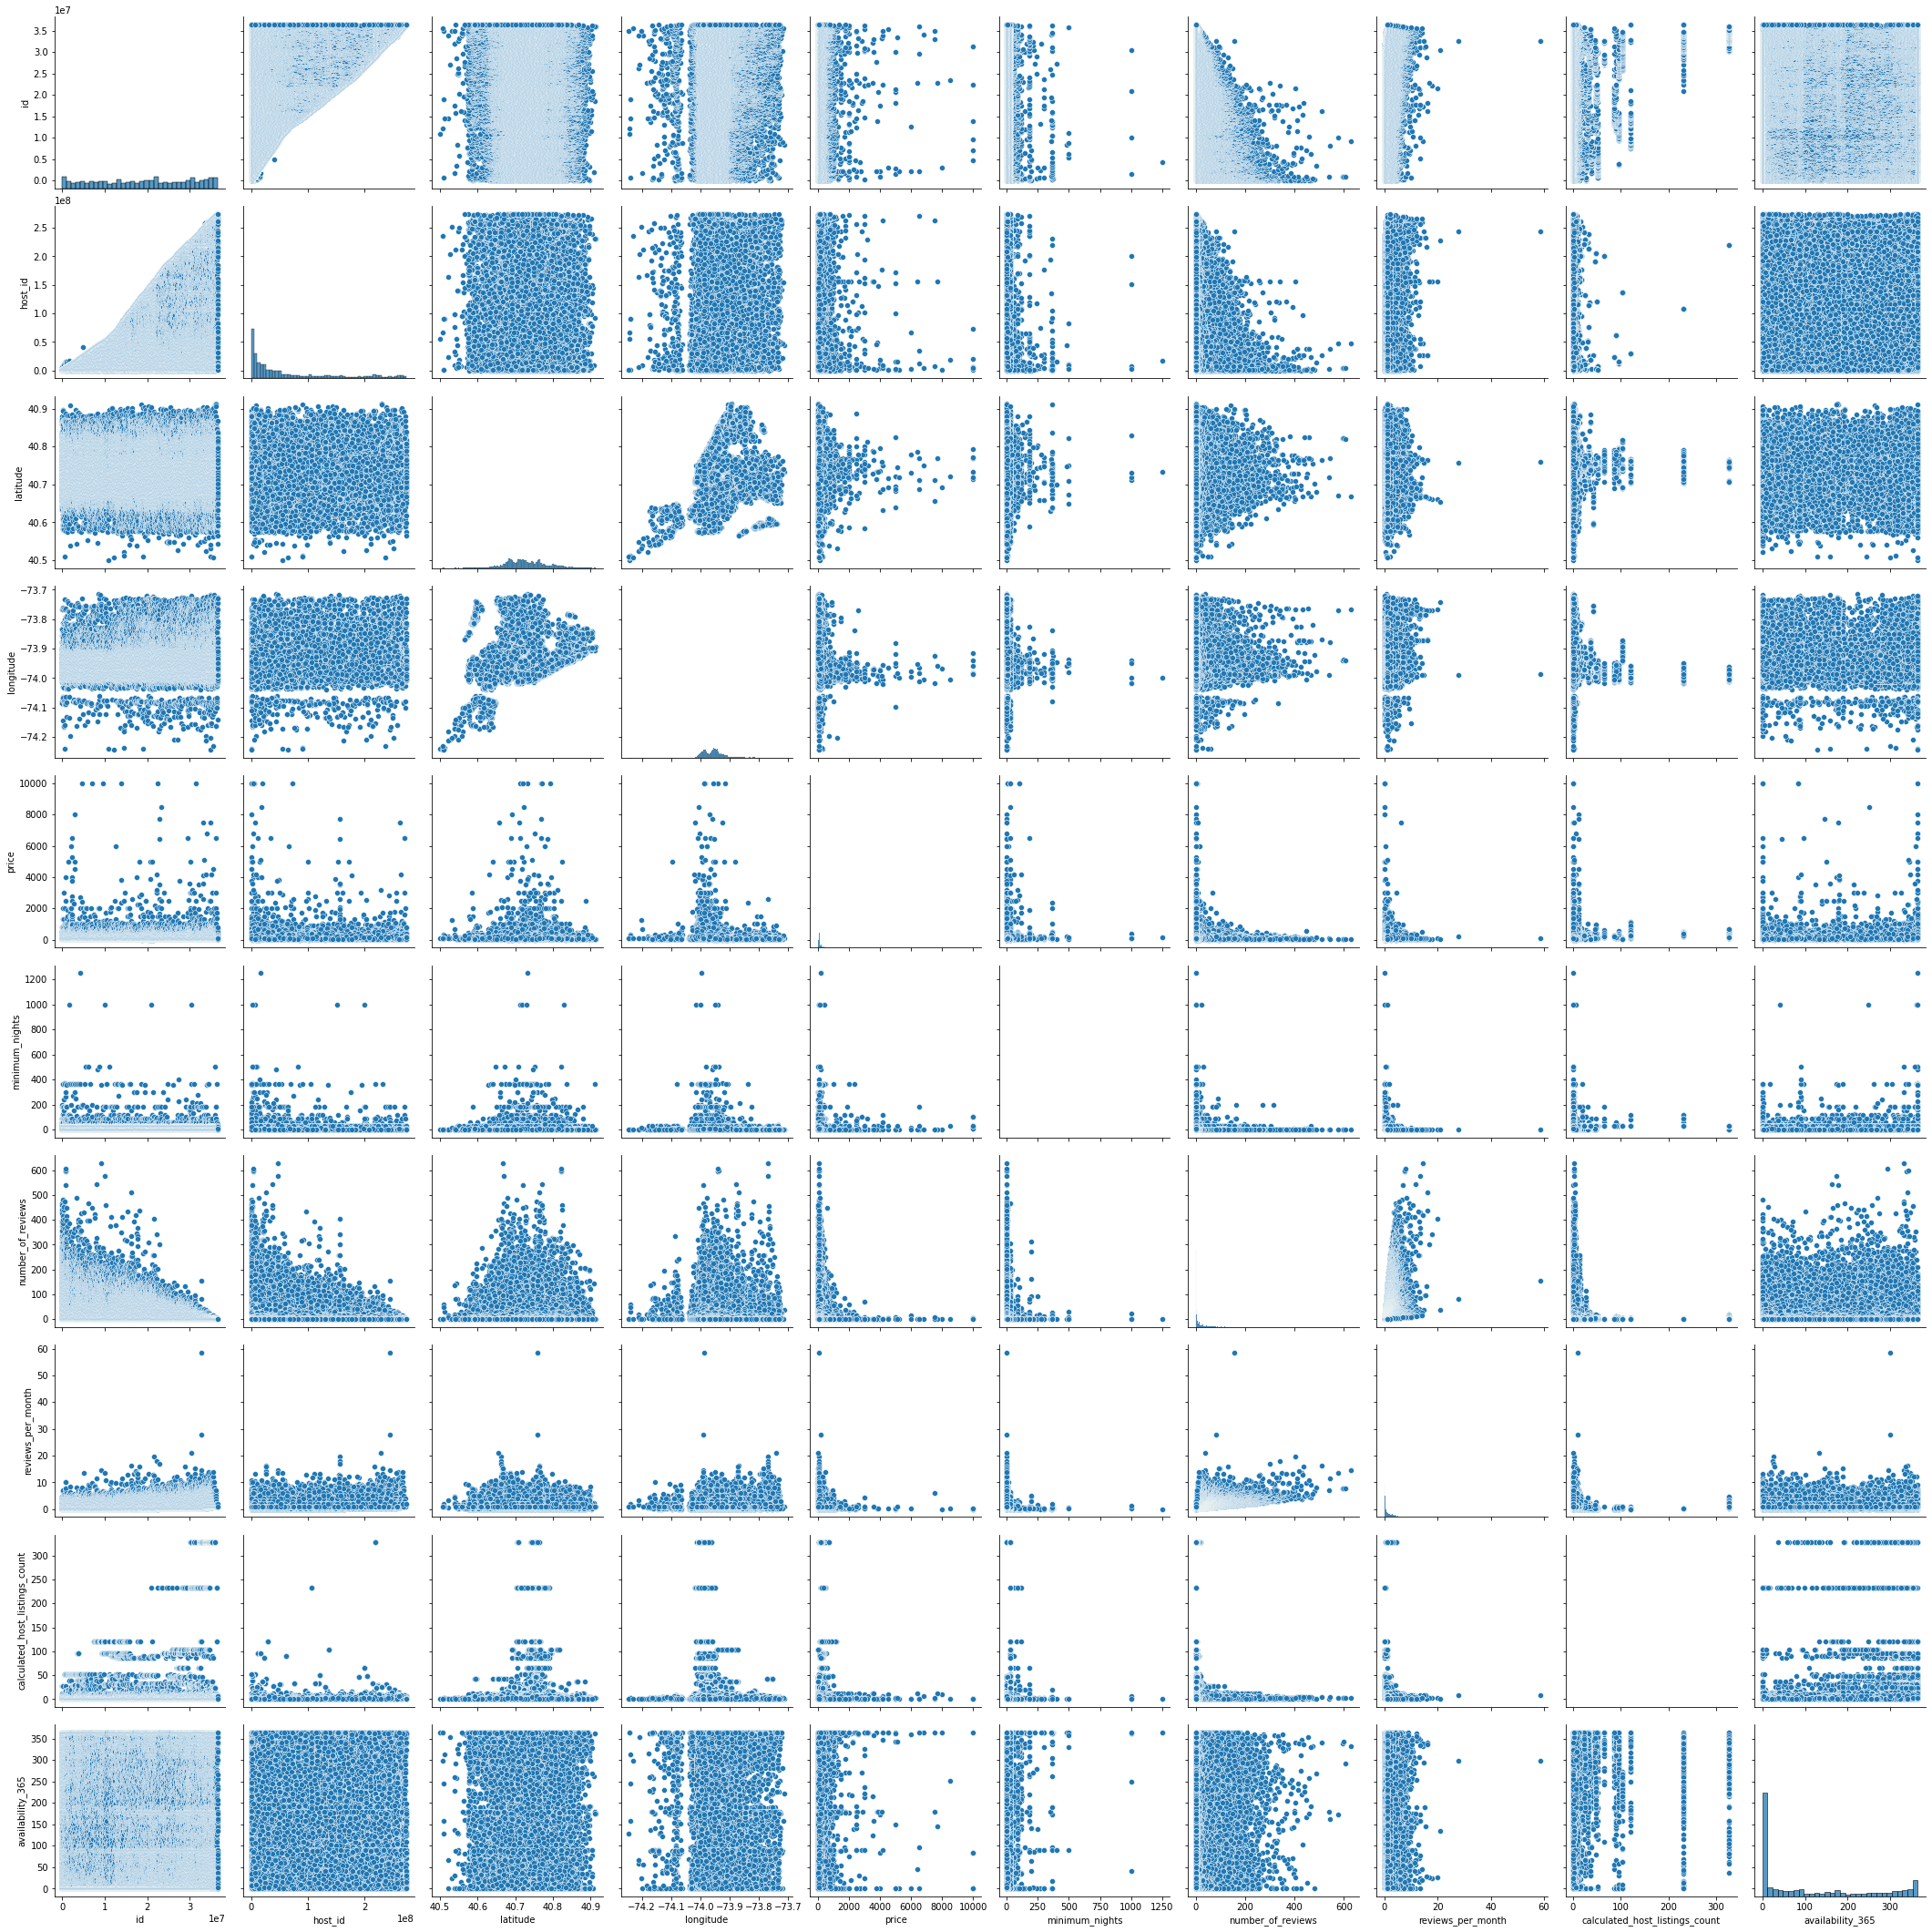

In [57]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, height=3, diag_kind="hist")
plt.show()

In [10]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Price Exploration

<AxesSubplot:>

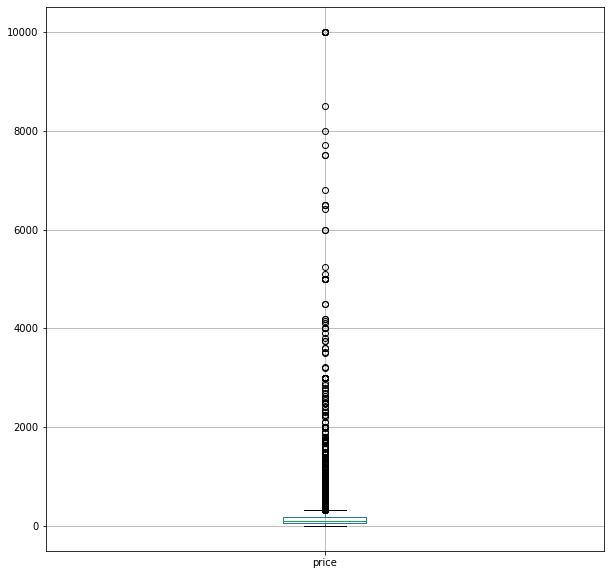

In [33]:
plt.figure(figsize=(10, 10))
df[['price']].boxplot()

Lots of outliers, not surprising as there's lots of very high end accomodations in NYC.
What are median, mean, and interquartile range?

In [31]:
print(f'Quartiles 25/75: {np.percentile(df["price"], [25])[0]}/{np.percentile(df["price"], [75])[0]}')
print(f'Mean: {np.round(np.mean(df["price"]), 2)}')
print(f'Median: {np.median(df["price"])}')

Quartiles 25/75: 69.0/175.0
Mean: 152.72
Median: 106.0


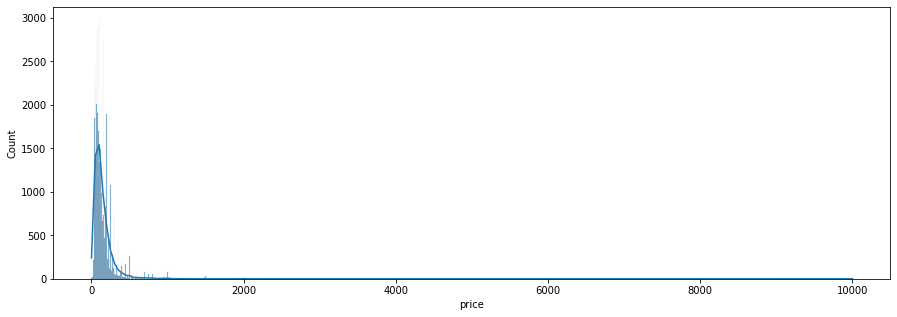

In [75]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.histplot(df['price'], kde=True)
plt.show()

Price by borough

Text(0.5, 1.0, 'Violin Plot of price by borough, Separated by room_type')

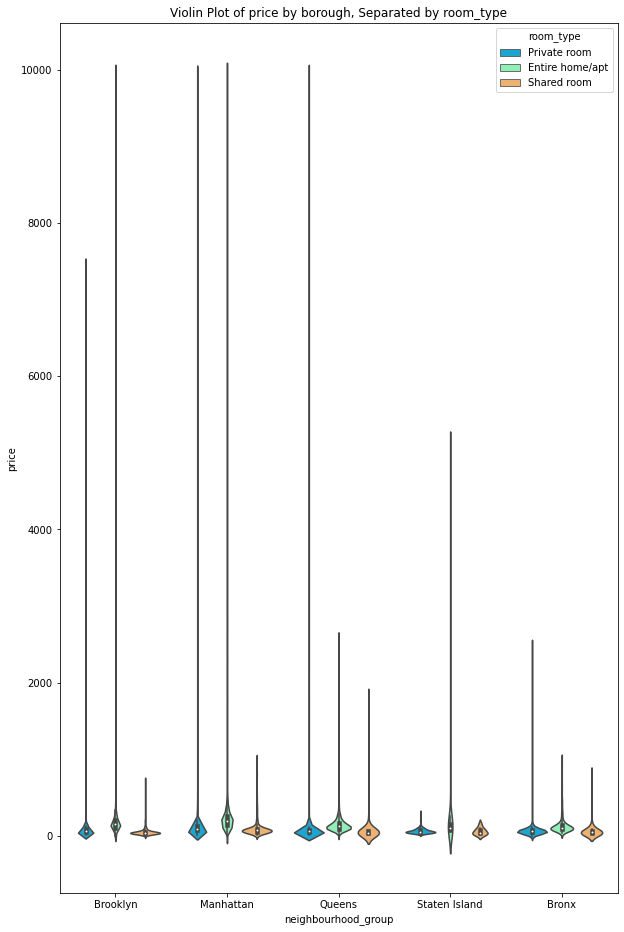

In [78]:
plt.figure(figsize=(10,16))

sns.violinplot(x='neighbourhood_group',y="price",data=df, hue='room_type', palette='rainbow')
plt.title("Violin Plot of price by borough, Separated by room_type")

Text(0.5, 1.0, 'Violin Plot of price by borough, Separated by room_type (REMOVED price>400 for visibility')

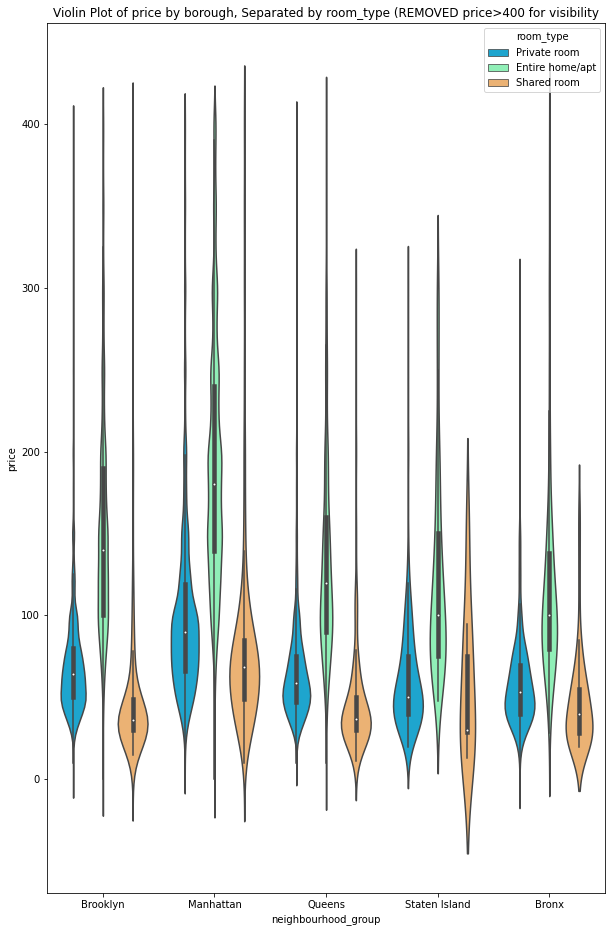

In [81]:
plt.figure(figsize=(10,16))

sns.violinplot(x='neighbourhood_group',y="price",data=df[df['price']<=400], hue='room_type', palette='rainbow', )
plt.title("Violin Plot of price by borough, Separated by room_type (REMOVED price>400 for visibility")

## Reviews Exporation

<AxesSubplot:>

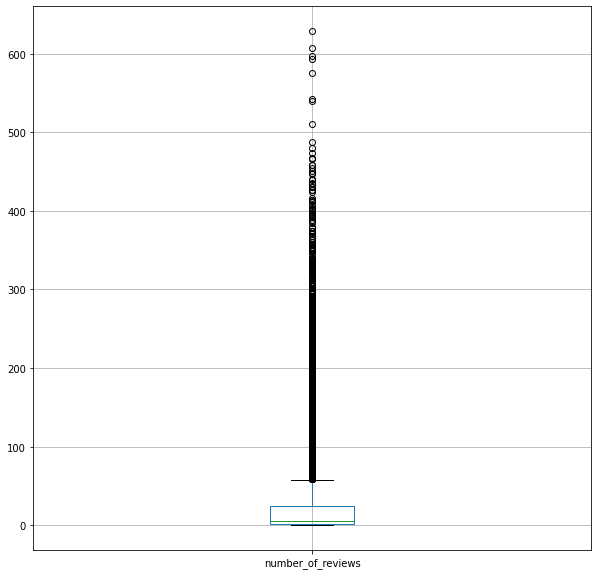

In [34]:
plt.figure(figsize=(10, 10))
df[['number_of_reviews']].boxplot()

Some properties have a LOT more reivews than most.

Guessing there's many new properties pulling the mean/average down well below the median

In [35]:
print(f'Quartiles 25/75: {np.percentile(df["number_of_reviews"], [25])[0]}/{np.percentile(df["number_of_reviews"], [75])[0]}')
print(f'Mean: {np.round(np.mean(df["number_of_reviews"]), 2)}')
print(f'Median: {np.median(df["number_of_reviews"])}')

Quartiles 25/75: 1.0/24.0
Mean: 23.27
Median: 5.0


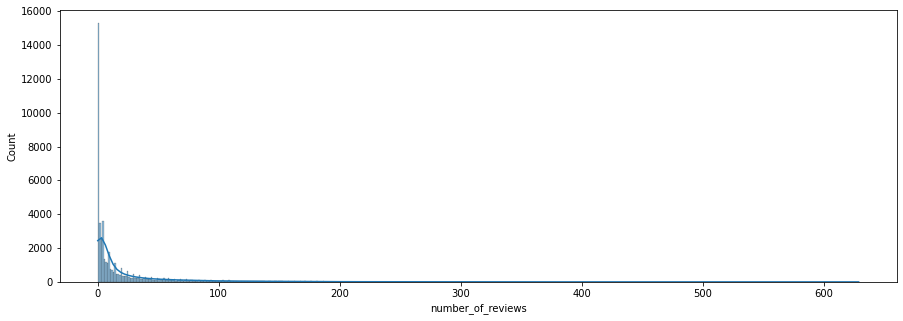

In [49]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.histplot(df['number_of_reviews'], kde=True)
plt.show()

### Availability Exploration

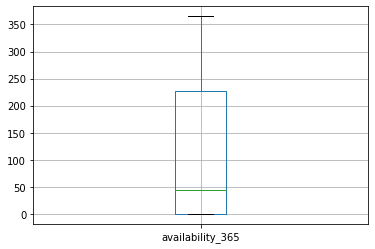

In [95]:
df[['availability_365']].boxplot();

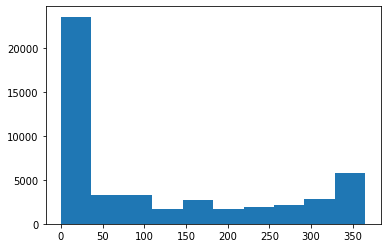

In [97]:
plt.hist(df['availability_365']);

I'm not sure what to make with values of:

0 - Are they off the market?

365 - Are they new?

In [98]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

## Neighborhood_group (borough) Exploration

In [50]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

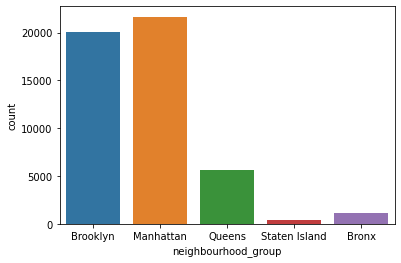

In [64]:
sns.countplot(x='neighbourhood_group', data=df)

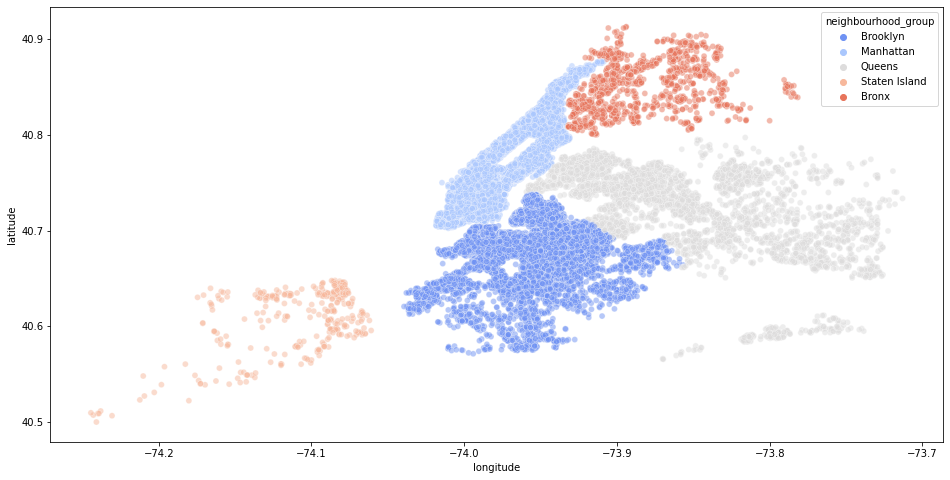

In [87]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df['neighbourhood_group'], alpha=.5, palette="coolwarm")
plt.show()

## Room Type Exploration

<AxesSubplot:xlabel='room_type', ylabel='count'>

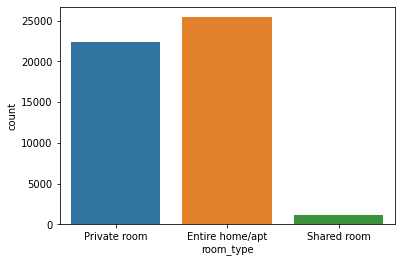

In [65]:
sns.countplot(x='room_type', data=df)

Room type by borough

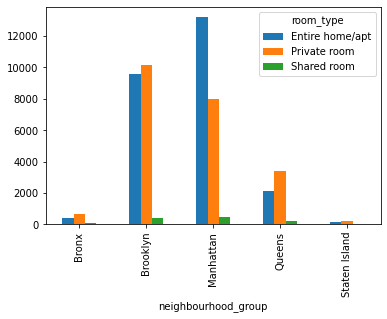

In [88]:
df.groupby('room_type')['neighbourhood_group'].value_counts().unstack(0).plot.bar();

### Analysis of 'Entire home/apt' ###

In [83]:
entire_home_df = df[df['room_type'] == 'Entire home/apt'].copy()
entire_home_df.shape

(25409, 16)

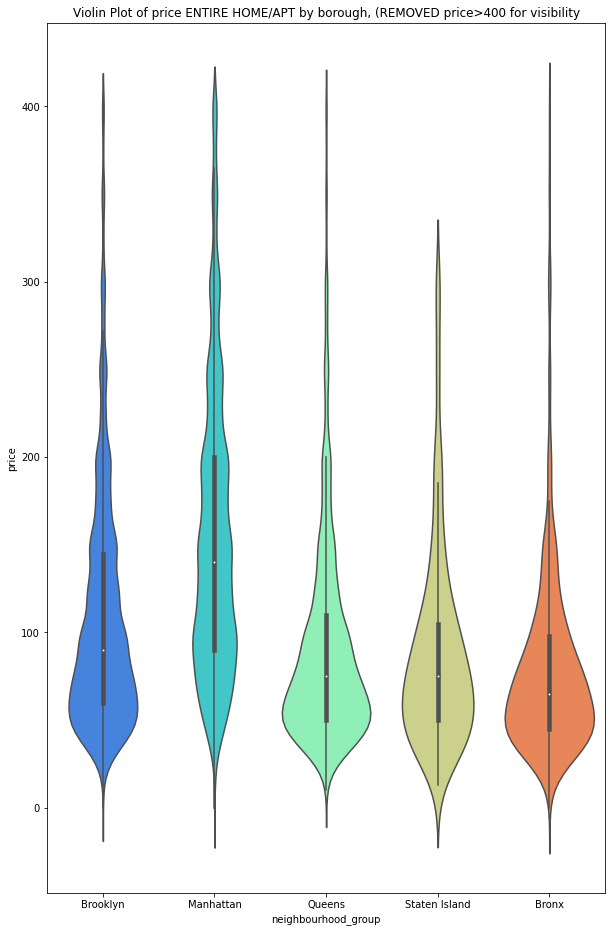

In [91]:
plt.figure(figsize=(10,16))

sns.violinplot(x='neighbourhood_group',y="price",data=df[df['price']<=400], palette='rainbow')
plt.title("Violin Plot of price ENTIRE HOME/APT by borough, (REMOVED price>400 for visibility");

Average prices for entire place

# Data Cleaning #

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Median real estate prices Q4-2019

Manhattan     $999,000

Brooklyn      $800,000

Queens        $610,000

Bronx         $491,450

Staten Island $536,617


https://www.nytimes.com/2022/02/11/realestate/median-prices-nyc-real-estate.html